In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import SGDRegressor


In [2]:
dataset = pd.read_csv("CO2 Emissions.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


 # **Data Visualization** 

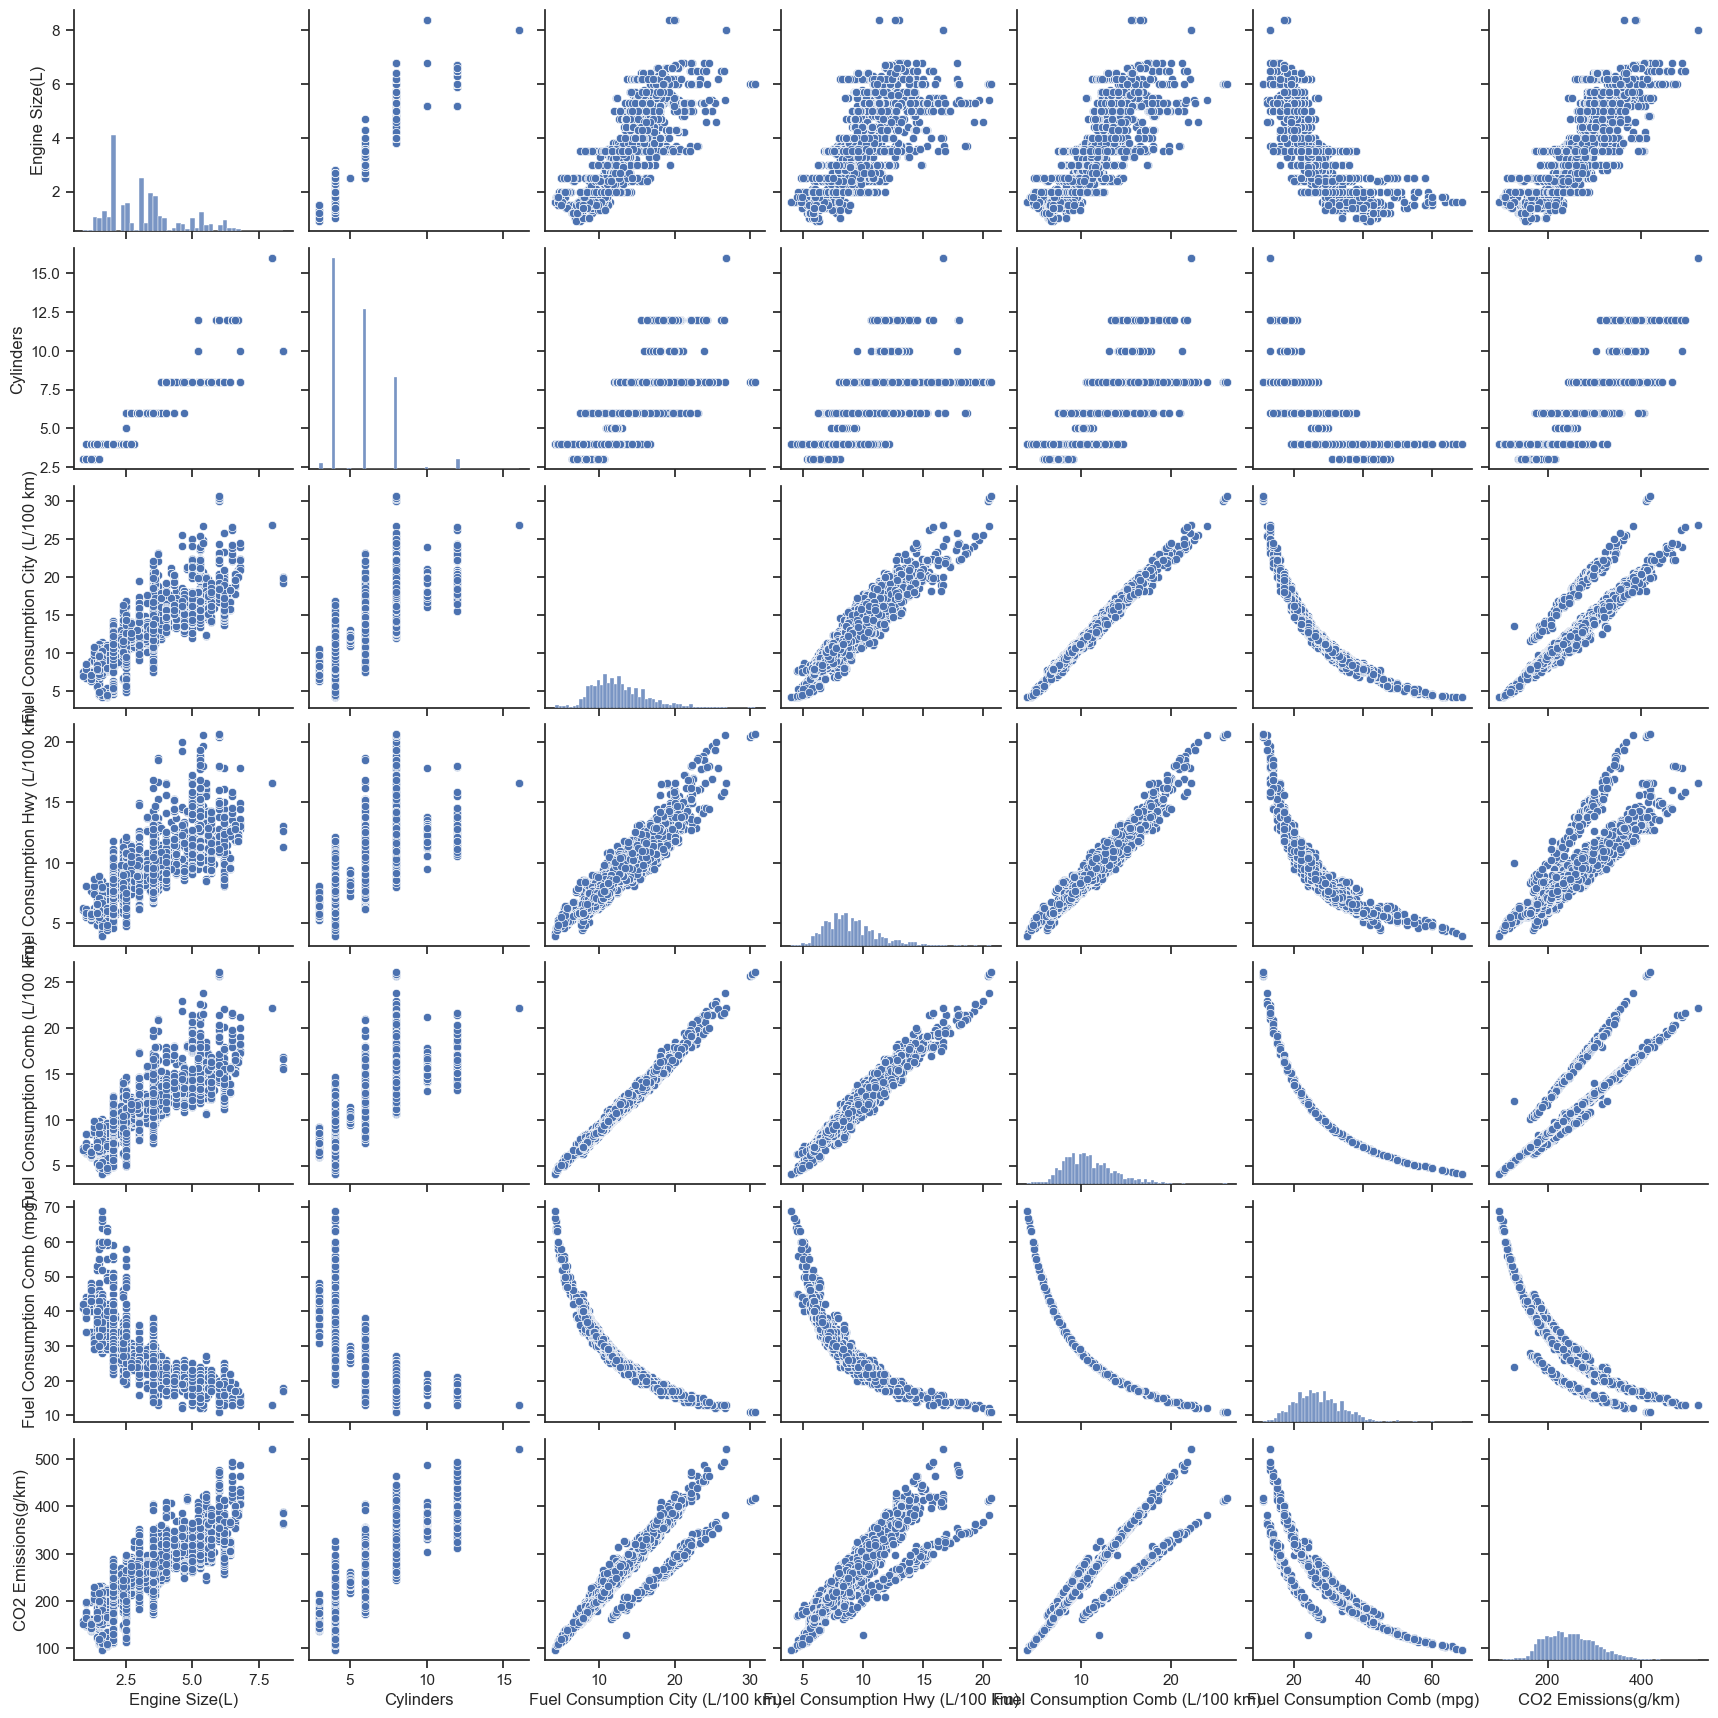

In [123]:
# Pair Plot
sns.pairplot(dataset)
plt.show()

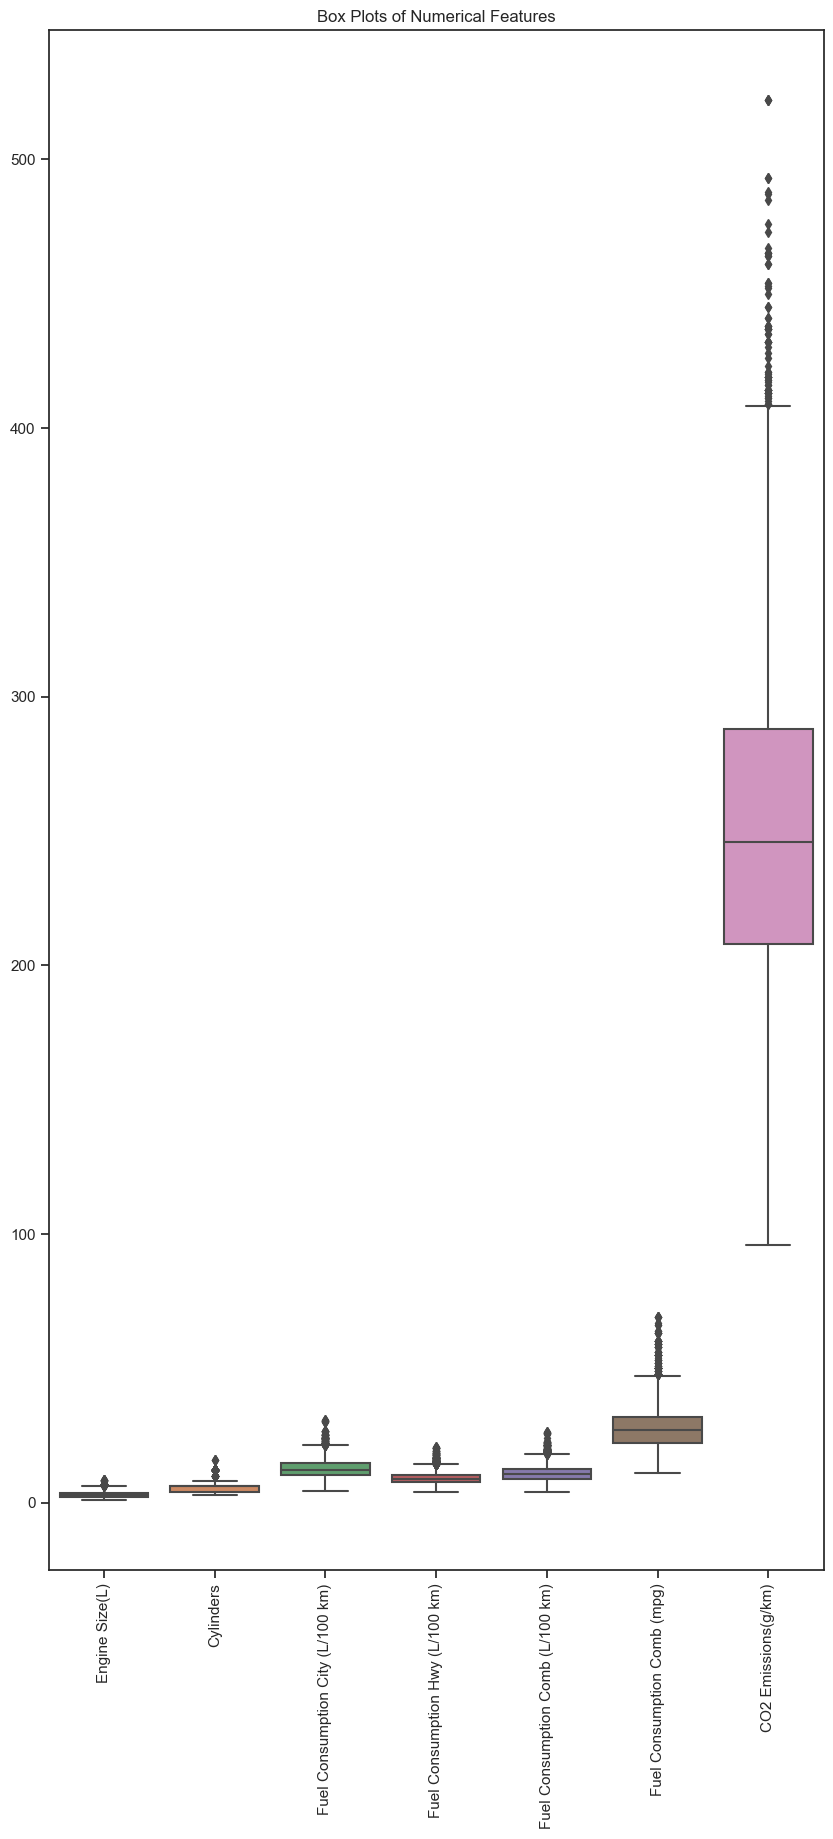

In [124]:
# Box Plots
plt.figure(figsize = (10, 20))
sns.boxplot(data = dataset)
sns.set(style="ticks")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14540\2768948920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


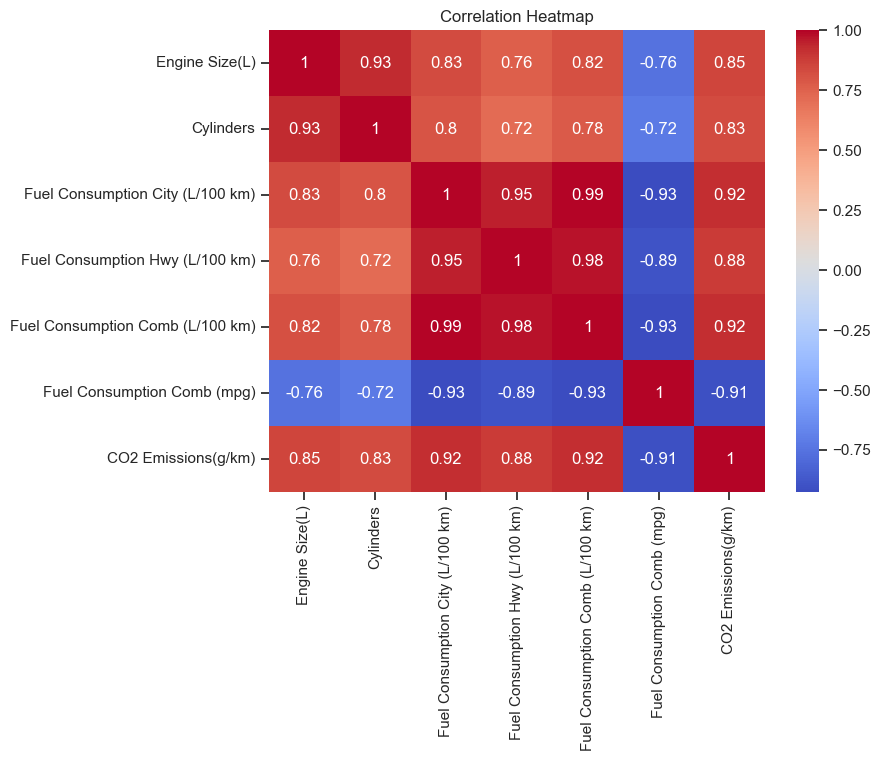

In [125]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


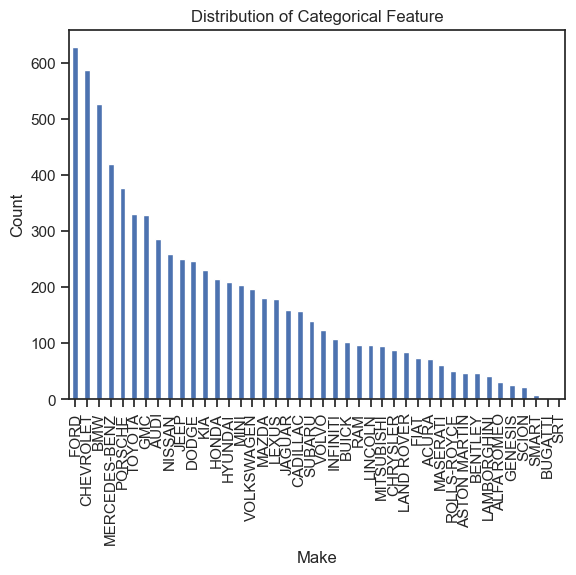

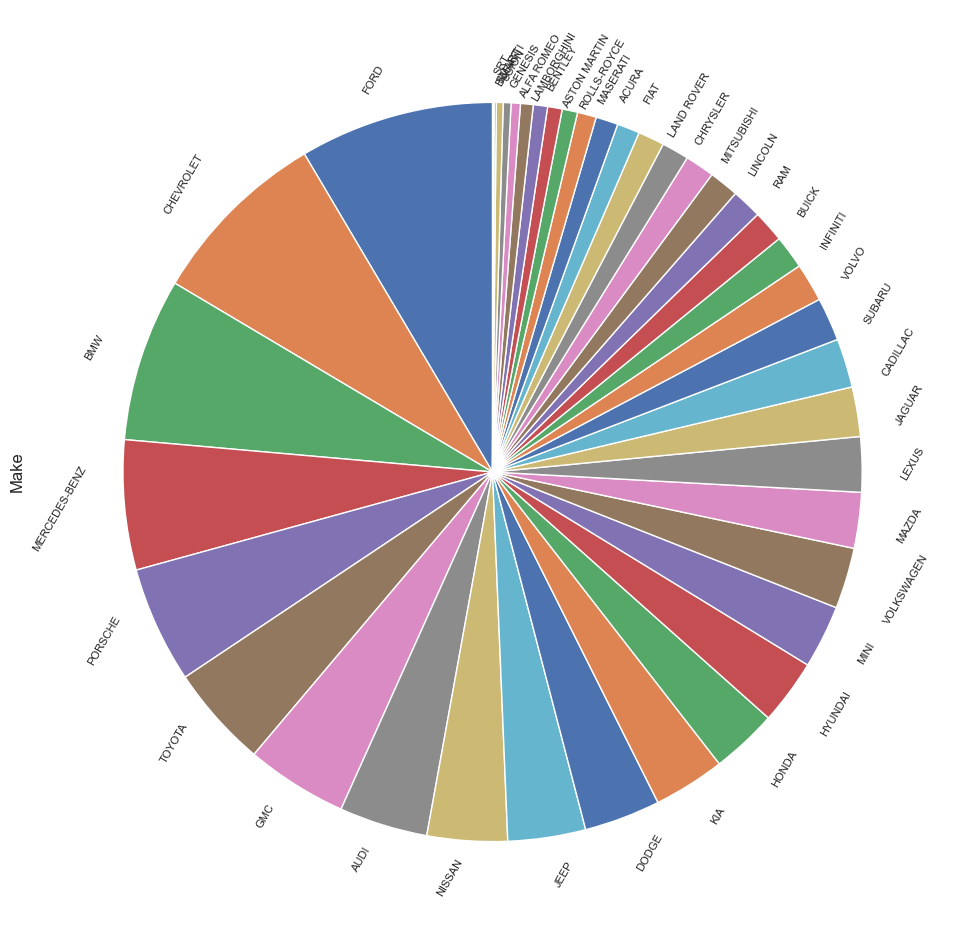

In [126]:
makeCounts = dataset['Make'].value_counts()
makeCounts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Categorical Feature')
plt.show()

# makeCounts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.figure(figsize=(12,12))
makeCounts.plot(kind='pie', startangle=90, textprops={'rotation': 60, 'fontsize': 8})
plt.show()

In [ ]:
# modelCounts = dataset['Model'].value_counts()
# modelCounts.plot(kind='bar')
# plt.xlabel('Model')
# plt.ylabel('Count')
# plt.title('Distribution of Categorical Feature')
# plt.show()

modelCounts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [ ]:
print(modelCounts)

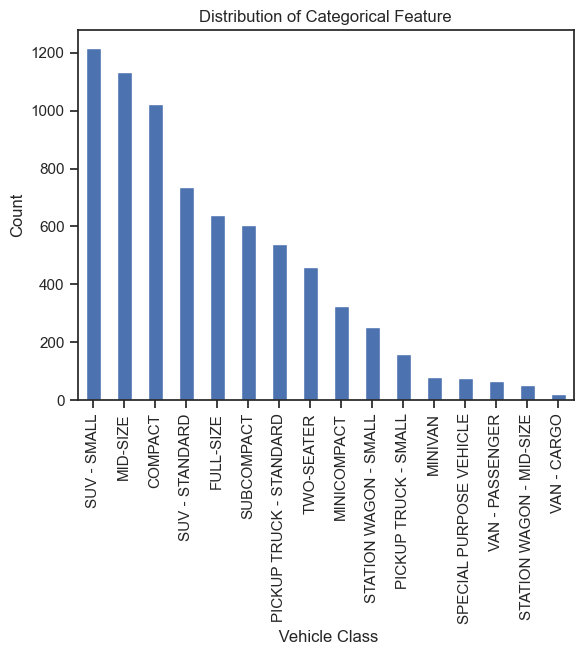

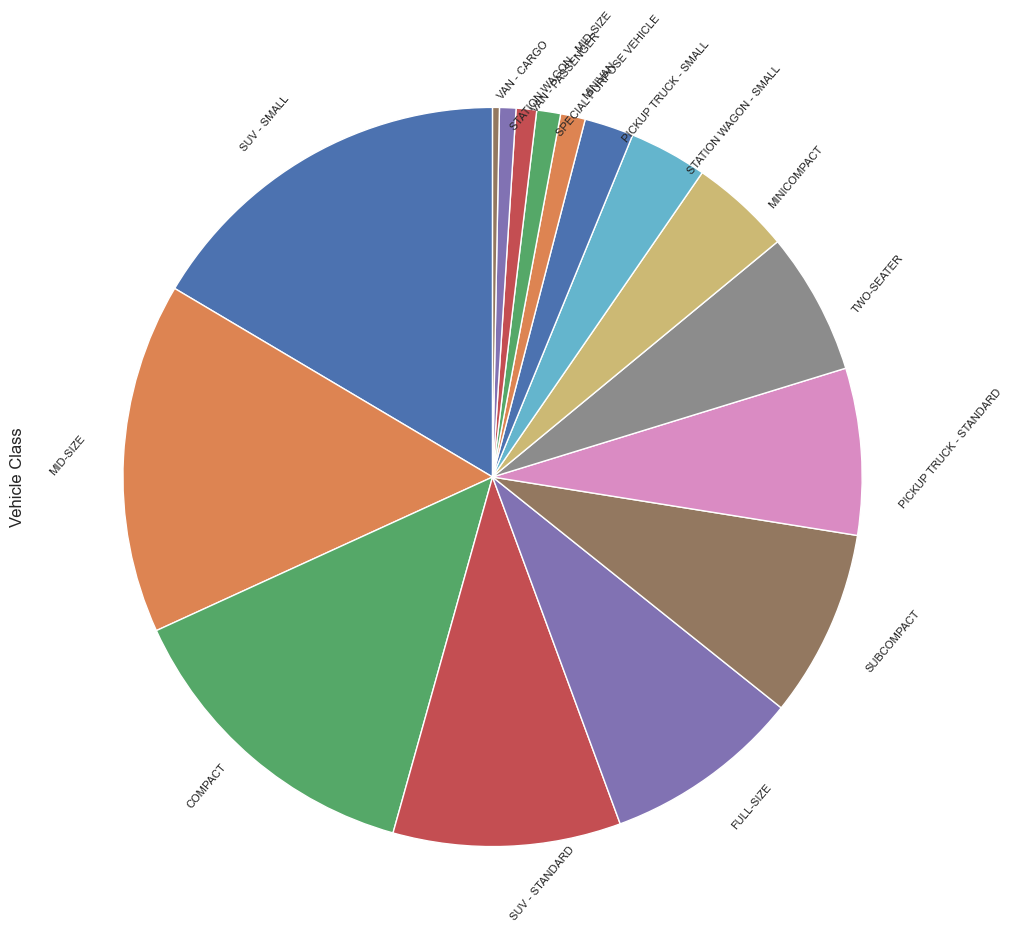

In [127]:
# Vehicle Class
vehicleClassCounts = dataset['Vehicle Class'].value_counts()
vehicleClassCounts.plot(kind='bar')
plt.xlabel(' Vehicle Class')
plt.ylabel('Count')
plt.title('Distribution of Categorical Feature')
plt.show()

plt.figure(figsize=(12, 12))
vehicleClassCounts.plot(kind='pie', startangle=90, textprops={'rotation': 50, 'fontsize': 8})
plt.show()


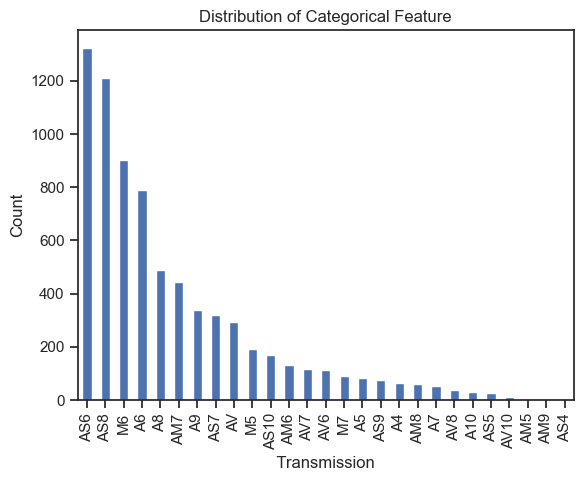

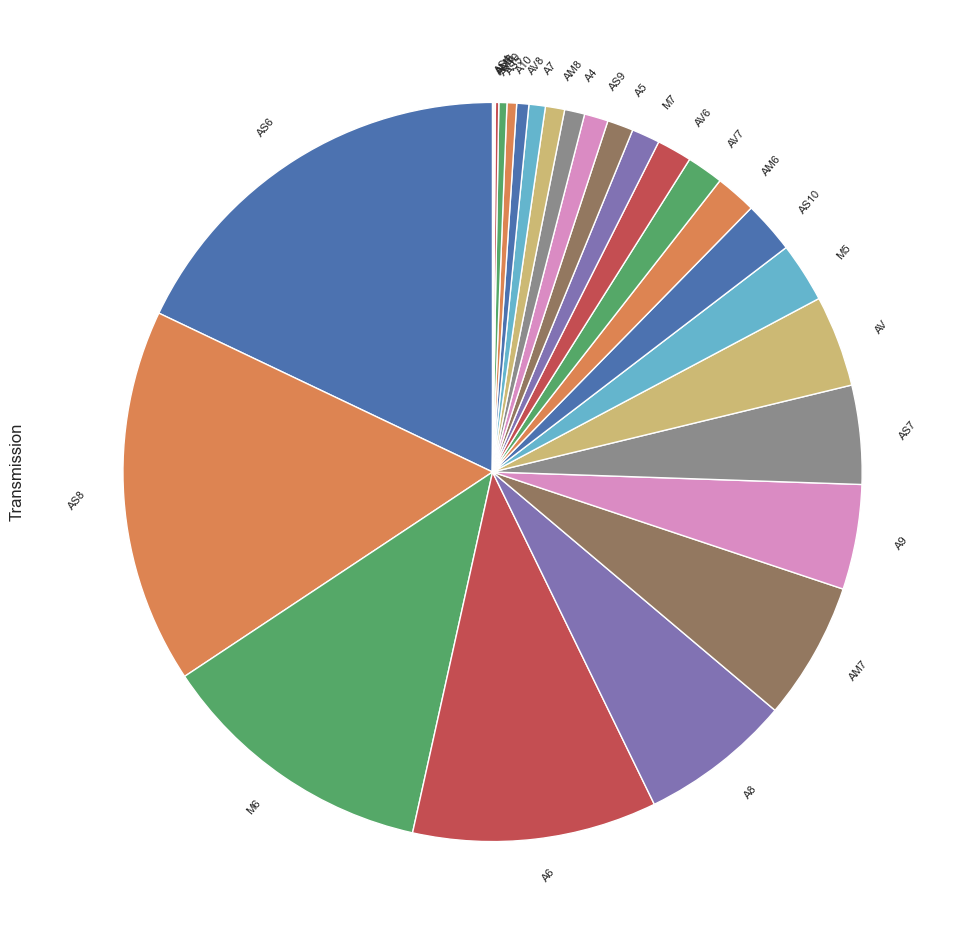

In [128]:
#  Transmission 
transmissionCounts = dataset['Transmission'].value_counts()
transmissionCounts.plot(kind='bar')
plt.xlabel(' Transmission ')
plt.ylabel('Count')
plt.title('Distribution of Categorical Feature')
plt.show()


plt.figure(figsize=(12, 12))
transmissionCounts.plot(kind='pie', startangle=90, textprops={'rotation': 50, 'fontsize': 8})
plt.show()


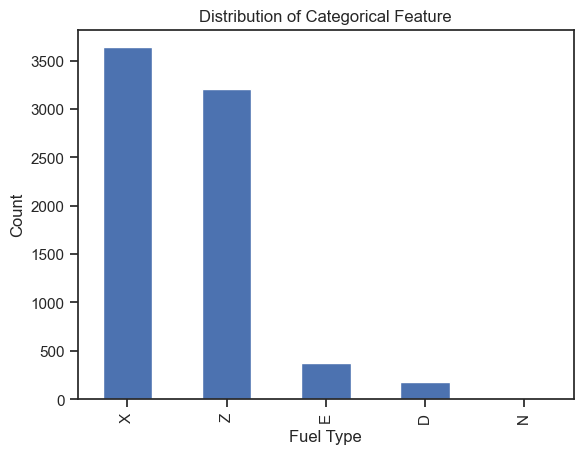

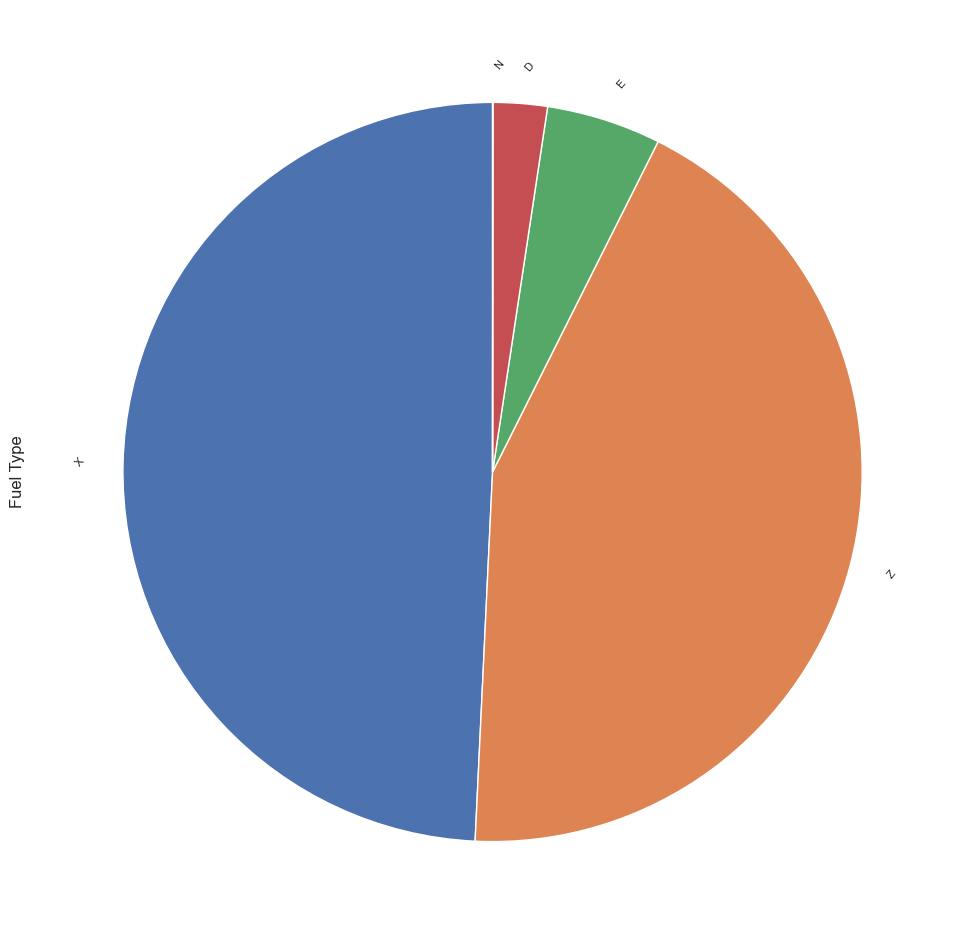

In [130]:
# Fuel Type
fuelTypeCounts = dataset['Fuel Type'].value_counts()
fuelTypeCounts.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Categorical Feature')
plt.show()

plt.figure(figsize=(12, 12))
fuelTypeCounts.plot(kind='pie', startangle=90, textprops={'rotation': 50, 'fontsize': 8})
plt.show()


# **Part B and C**

In [4]:
label_encoder = LabelEncoder()

# Apply numerical encoding to categorical features
dataset['Make_Encoded'] = label_encoder.fit_transform(dataset['Make'])
dataset['Model_Encoded'] = label_encoder.fit_transform(dataset['Model'])
dataset['Vehicle_Class_Encoded'] = label_encoder.fit_transform(dataset['Vehicle Class'])
dataset['Transmission_encoded'] = label_encoder.fit_transform(dataset['Transmission'])
dataset['Fuel_Type_Encoded'] = label_encoder.fit_transform(dataset['Fuel Type'])

numericalEncodedDataset = dataset.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis=1)

print(numericalEncodedDataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   CO2 Emissions(g/km)               7385 non-null   int64  
 7   Make_Encoded                      7385 non-null   int32  
 8   Model_Encoded                     7385 non-null   int32  
 9   Vehicle_Class_Encoded             7385 non-null   int32  
 10  Transmission_encoded              7385 non-null   int32  
 11  Fuel_Type_Encoded                 7385 non-null   int32  
dtypes: flo

In [5]:
Features = numericalEncodedDataset.drop(['CO2 Emissions(g/km)'], axis=1)
Target = numericalEncodedDataset['CO2 Emissions(g/km)']

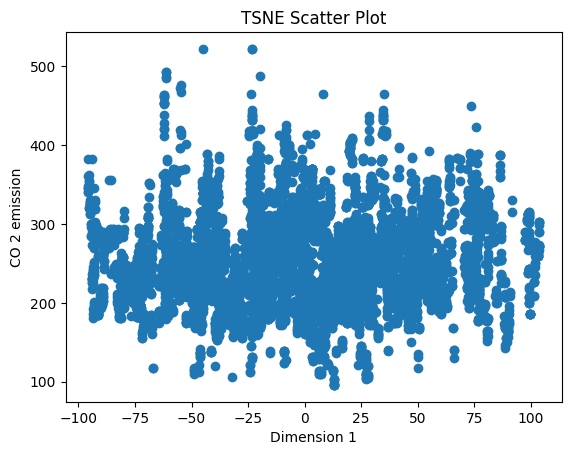

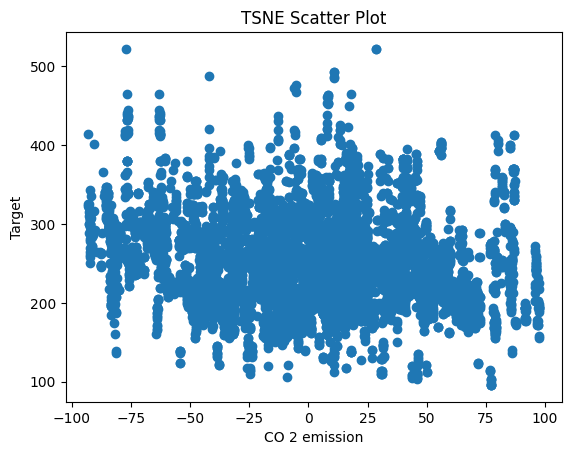

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [7]:
tsne = TSNE(n_components = 2)
tsneDataset = tsne.fit_transform(Features)
plt.scatter(tsneDataset[:, 0], Target)

plt.title('TSNE Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('CO 2 emission')
plt.show()

plt.scatter(tsneDataset[:, 1], Target)
plt.title('TSNE Scatter Plot')
plt.xlabel('CO 2 emission')
plt.ylabel('Target')
plt.show()

<Axes: >

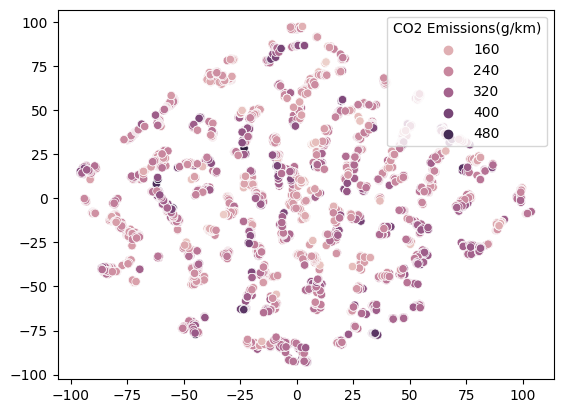

In [8]:
sns.scatterplot(x=tsneDataset[:, 0], y=tsneDataset[:, 1], hue=numericalEncodedDataset['CO2 Emissions(g/km)'])


In [57]:
class linearRegression:
    def __init__(self,learningRate, epochs):
        self.learningRate = learningRate
        self.trainingLoss = []
        self.epochs = epochs

    def train(self,  train_x, train_y):
        self.noOfSamples = train_x.shape[0]
        self.noOfFeatures = train_x.shape[1] + 1
        self.Xis = train_x
        self.Yis = train_y
        self.theta = np.random.rand(self.noOfFeatures)
        self.Xis = np.array(self.Xis)
        Xmean = self.Xis.mean(axis=0)
        Xstd = self.Xis.std(axis=0)
        Xstd[Xstd == 0] = 1e-8
        for z in range(self.Xis.shape[0]):
            self.Xis[z] = (self.Xis[z]-Xmean)/Xstd
        X0s = np.ones((self.noOfSamples,1))
        self.Xis = np.concatenate((X0s, self.Xis), axis=1)

        for i in range(self.epochs):
            print("Epoch -- ", i)
            predicted = self.predict(self.Xis)
            self.theta = self.theta - ((self.learningRate)*(2/self.noOfSamples)*((self.Xis.T)@(predicted - self.Yis)))
            print("MSE : ", mean_squared_error(predicted, self.Yis))
            self.trainingLoss.append(mean_squared_error(predicted, self.Yis))


  
    def predict(self, test_x):
        return  np.matmul(test_x, self.theta)
    def calculateAccuracy(self, test_x, test_y):
        test_x = np.array(test_x)
        Xmean = test_x.mean(axis=0)
        Xstd = test_x.std(axis=0)
        Xstd[Xstd == 0] = 1e-8
        
        for z in range(test_x.shape[0]):
            test_x[z] = (test_x[z]-Xmean)/Xstd
        X0s = np.ones((test_x.shape[0],1))
        test_x = np.concatenate((X0s, test_x), axis=1)        
        predictedValues = self.predict(test_x)

        mse = mean_squared_error(test_y, predictedValues)
        rmse= mean_squared_error(test_y, predictedValues, squared=False)
        r2 = r2_score(test_y, predictedValues)
        n = test_x.shape[0]
        p = test_x.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        mae = mean_absolute_error(test_y, predictedValues)

        print("Mean squared error : ", mse)
        print("Root mean squared error : ", rmse)
        print("R2 error : ", r2)
        print("Adjusted R2 : ", adj_r2)
        print("Mean Absolute Error : ", mae)

# **Splitting the data**

In [58]:
Features = Features.values
Target = Target.values

In [59]:
train_x, test_x, train_y, test_y = train_test_split(Features, Target, test_size = 0.2, random_state = 0)

In [68]:
model1 = linearRegression( 0.1, 300)
model1.train(train_x, train_y)

Epoch --  0
MSE :  65800.340277829
Epoch --  1
MSE :  40477.904639754895
Epoch --  2
MSE :  25990.03042677455
Epoch --  3
MSE :  16738.723136817447
Epoch --  4
MSE :  10818.651625353
Epoch --  5
MSE :  7030.00756654245
Epoch --  6
MSE :  4605.2960953991915
Epoch --  7
MSE :  3053.410768996382
Epoch --  8
MSE :  2060.091160504177
Epoch --  9
MSE :  1424.2361534836512
Epoch --  10
MSE :  1017.1544316867573
Epoch --  11
MSE :  756.4903089451776
Epoch --  12
MSE :  589.5393105954515
Epoch --  13
MSE :  482.57182653940765
Epoch --  14
MSE :  414.0011706645597
Epoch --  15
MSE :  370.0116399043434
Epoch --  16
MSE :  341.7607410033234
Epoch --  17
MSE :  323.58875708250025
Epoch --  18
MSE :  311.87294205994164
Epoch --  19
MSE :  304.29423928829084
Epoch --  20
MSE :  299.3679957027458
Epoch --  21
MSE :  296.14362275541816
Epoch --  22
MSE :  294.0123781896216
Epoch --  23
MSE :  292.58434285319873
Epoch --  24
MSE :  291.6096815086009
Epoch --  25
MSE :  290.9282453159941
Epoch --  26
MSE

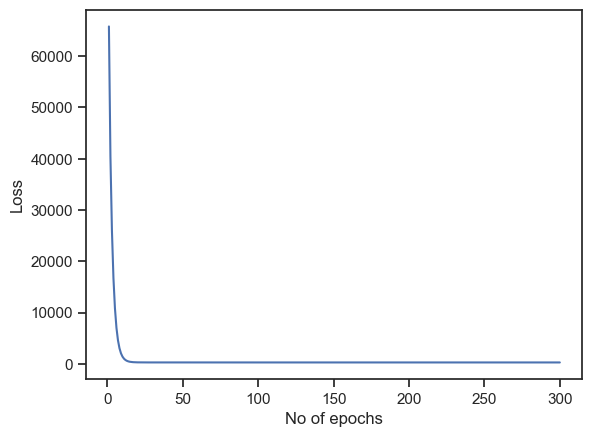

In [70]:
xis = range(1, 301)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.plot(xis, model1.trainingLoss)
plt.show()


In [71]:
# Testing the model
model1.calculateAccuracy(train_x, train_y)
model1.calculateAccuracy(test_x, test_y)

Mean squared error :  285.94899467668586
Root mean squared error :  16.910026454050445
R2 error :  0.9164537815525722
Adjusted R2 :  0.9162837129145113
Mean Absolute Error :  11.07130080002828
Mean squared error :  295.4989301017663
Root mean squared error :  17.190082318062537
R2 error :  0.9137385977703066
Adjusted R2 :  0.9130315370962927
Mean Absolute Error :  10.980981663091198


# **Part D**

In [19]:
pca = PCA(n_components = 4)
dim_reduced4_train_x = pca.fit_transform(train_x)
dim_reduced4_test_x = pca.transform(test_x)

pca = PCA(n_components = 6)
dim_reduced6_train_x = pca.fit_transform(train_x)
dim_reduced6_test_x = pca.transform(test_x)

pca = PCA(n_components = 8)
dim_reduced8_train_x = pca.fit_transform(train_x)
dim_reduced8_test_x = pca.transform(test_x)

pca = PCA(n_components = 10)
dim_reduced10_train_x = pca.fit_transform(train_x)
dim_reduced10_test_x = pca.transform(test_x)

In [20]:
dim_reduced4_model = linearRegression(0.01, 400)
dim_reduced4_model.train(dim_reduced4_train_x, train_y)
dim_reduced4_model.calculateAccuracy(dim_reduced4_test_x, test_y)

Epoch --  0
MSE :  66155.99094420276
Epoch --  1
MSE :  63554.01841236025
Epoch --  2
MSE :  61055.083992778724
Epoch --  3
MSE :  58655.1073762126
Epoch --  4
MSE :  56350.16983366252
Epoch --  5
MSE :  54136.50781779741
Epoch --  6
MSE :  52010.506817760564
Epoch --  7
MSE :  49968.695457325164
Epoch --  8
MSE :  48007.739826763005
Epoch --  9
MSE :  46124.438039171124
Epoch --  10
MSE :  44315.715002367884
Epoch --  11
MSE :  42578.61739782204
Epoch --  12
MSE :  40910.308858416225
Epoch --  13
MSE :  39308.06533717087
Epoch --  14
MSE :  37769.270659366826
Epoch --  15
MSE :  36291.41225080383
Epoch --  16
MSE :  34872.077035219925
Epoch --  17
MSE :  33508.94749417314
Epoch --  18
MSE :  32199.79788295181
Epoch --  19
MSE :  30942.49059633485
Epoch --  20
MSE :  29734.972678267914
Epoch --  21
MSE :  28575.272469756434
Epoch --  22
MSE :  27461.496389502012
Epoch --  23
MSE :  26391.82584202566
Epoch --  24
MSE :  25364.514248229378
Epoch --  25
MSE :  24377.884193547423
Epoch -- 

In [22]:
dim_reduced6_model = linearRegression(0.01, 400)
dim_reduced6_model.train(dim_reduced6_train_x, train_y)
dim_reduced6_model.calculateAccuracy(dim_reduced6_test_x, test_y)

Epoch --  0
MSE :  66144.31907758045
Epoch --  1
MSE :  63539.791593985414
Epoch --  2
MSE :  61038.40339874073
Epoch --  3
MSE :  58636.07017602774
Epoch --  4
MSE :  56328.8693489342
Epoch --  5
MSE :  54113.03367459354
Epoch --  6
MSE :  51984.94509295678
Epoch --  7
MSE :  49941.128819152844
Epoch --  8
MSE :  47978.24766979153
Epoch --  9
MSE :  46093.09661394493
Epoch --  10
MSE :  44282.59753990985
Epoch --  11
MSE :  42543.79422920657
Epoch --  12
MSE :  40873.84752960714
Epoch --  13
MSE :  39270.03071931184
Epoch --  14
MSE :  37729.725054704235
Epoch --  15
MSE :  36250.4154944151
Epoch --  16
MSE :  34829.686592713406
Epoch --  17
MSE :  33465.2185555191
Epoch --  18
MSE :  32154.783452597687
Epoch --  19
MSE :  30896.241579751975
Epoch --  20
MSE :  29687.537965070936
Epoch --  21
MSE :  28526.699013531274
Epoch --  22
MSE :  27411.82928447258
Epoch --  23
MSE :  26341.108396684613
Epoch --  24
MSE :  25312.788056053043
Epoch --  25
MSE :  24325.189200910492
Epoch --  26
M

In [23]:
dim_reduced8_model = linearRegression(0.01, 400)
dim_reduced8_model.train(dim_reduced8_train_x, train_y)
dim_reduced8_model.calculateAccuracy(dim_reduced8_test_x, test_y)

Epoch --  0
MSE :  66108.73015002684
Epoch --  1
MSE :  63502.23269126574
Epoch --  2
MSE :  60998.952531871575
Epoch --  3
MSE :  58594.80226678943
Epoch --  4
MSE :  56285.85635220454
Epoch --  5
MSE :  54068.3446958372
Epoch --  6
MSE :  51938.64650106202
Epoch --  7
MSE :  49893.28435479994
Epoch --  8
MSE :  47928.91854952983
Epoch --  9
MSE :  46042.34163014842
Epoch --  10
MSE :  44230.473156774504
Epoch --  11
MSE :  42490.354674946204
Epoch --  12
MSE :  40819.144884998306
Epoch --  13
MSE :  39214.115002732346
Epoch --  14
MSE :  37672.64430380411
Epoch --  15
MSE :  36192.21584455343
Epoch --  16
MSE :  34770.41235228909
Epoch --  17
MSE :  33404.912278318414
Epoch --  18
MSE :  32093.48600727697
Epoch --  19
MSE :  30833.992216568764
Epoch --  20
MSE :  29624.374379972614
Epoch --  21
MSE :  28462.657409705665
Epoch --  22
MSE :  27346.94443146129
Epoch --  23
MSE :  26275.413687155393
Epoch --  24
MSE :  25246.315560324012
Epoch --  25
MSE :  24257.969719315148
Epoch --  2

In [24]:
dim_reduced10_model = linearRegression(0.01, 400)
dim_reduced10_model.train(dim_reduced10_train_x, train_y)
dim_reduced10_model.calculateAccuracy(dim_reduced10_test_x, test_y)

Epoch --  0
MSE :  66196.03483850084
Epoch --  1
MSE :  63585.99525210136
Epoch --  2
MSE :  61079.31323332328
Epoch --  3
MSE :  58671.895822488805
Epoch --  4
MSE :  56359.81214112338
Epoch --  5
MSE :  54139.28697354003
Epoch --  6
MSE :  52006.69460259298
Epoch --  7
MSE :  49958.55288953544
Epoch --  8
MSE :  47991.517588314964
Epoch --  9
MSE :  46102.37688502283
Epoch --  10
MSE :  44288.046153581054
Epoch --  11
MSE :  42545.56291910438
Epoch --  12
MSE :  40872.08202071298
Epoch --  13
MSE :  39264.87096589788
Epoch --  14
MSE :  37721.305468853454
Epoch --  15
MSE :  36238.865165491996
Epoch --  16
MSE :  34815.129498143644
Epoch --  17
MSE :  33447.77376322229
Epoch --  18
MSE :  32134.565315403826
Epoch --  19
MSE :  30873.359922118965
Epoch --  20
MSE :  29662.09826240819
Epoch --  21
MSE :  28498.80256442196
Epoch --  22
MSE :  27381.573376075987
Epoch --  23
MSE :  26308.586463588512
Epoch --  24
MSE :  25278.08983283554
Epoch --  25
MSE :  24288.40086866039
Epoch --  26

# **Part E**

In [72]:
df = pd.read_csv("CO2 Emissions.csv")
one_hot_dataset = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)

In [76]:
one_hot_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Columns: 2145 entries, Engine Size(L) to Fuel Type_Z
dtypes: float64(4), int64(3), uint8(2138)
memory usage: 15.5 MB


In [83]:
Features = one_hot_dataset.drop(['CO2 Emissions(g/km)'], axis=1)
Target = one_hot_dataset['CO2 Emissions(g/km)']
Features = Features.values
Target = Target.values
train_x, test_x, train_y, test_y = train_test_split(Features, Target, test_size = 0.2, random_state = 0)

In [92]:
one_hot_model = linearRegression(0.1, 1000)
one_hot_model.train(train_x, train_y)

Epoch --  0
MSE :  65887.3570143004
Epoch --  1
MSE :  41201.22232425782
Epoch --  2
MSE :  26091.807005782797
Epoch --  3
MSE :  16625.330329246066
Epoch --  4
MSE :  10627.335052203134
Epoch --  5
MSE :  6806.592413154233
Epoch --  6
MSE :  4366.500623536698
Epoch --  7
MSE :  2806.1500709002894
Epoch --  8
MSE :  1807.6587471141522
Epoch --  9
MSE :  1168.412122080849
Epoch --  10
MSE :  758.9960778314436
Epoch --  11
MSE :  496.6670942668883
Epoch --  12
MSE :  328.4940906373485
Epoch --  13
MSE :  220.60730415876063
Epoch --  14
MSE :  151.32998103810834
Epoch --  15
MSE :  106.78687138123968
Epoch --  16
MSE :  78.09515941175398
Epoch --  17
MSE :  59.56720347299268
Epoch --  18
MSE :  47.560483741350794
Epoch --  19
MSE :  39.74162633096741
Epoch --  20
MSE :  34.61538142363378
Epoch --  21
MSE :  31.223150323993703
Epoch --  22
MSE :  28.950016375060958
Epoch --  23
MSE :  27.401217112054624
Epoch --  24
MSE :  26.323060254995763
Epoch --  25
MSE :  25.55228625067651
Epoch --  

ValueError: x and y must have same first dimension, but have shapes (600,) and (800,)

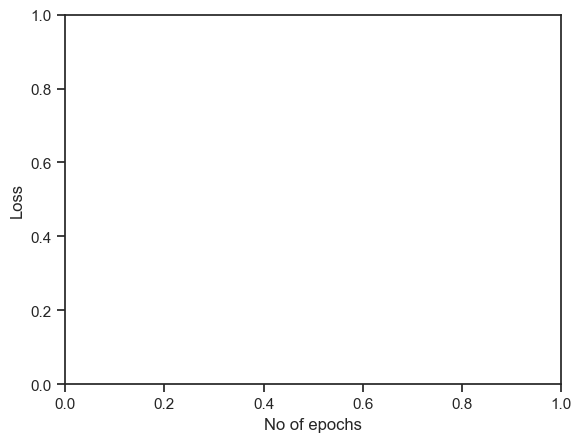

In [88]:
xis = range(1, 601)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.plot(xis, one_hot_model.trainingLoss)
plt.show()

In [93]:
print("Training Accuracy : ")
one_hot_model.calculateAccuracy(train_x, train_y)
print("Testing Accuracy : ")
one_hot_model.calculateAccuracy(test_x, test_y)

Training Accuracy : 
Mean squared error :  9.442829225289232
Root mean squared error :  3.0729186818543104
R2 error :  0.9972410720516441
Adjusted R2 :  0.9956679990986342
Mean Absolute Error :  1.987334823268449
Testing Accuracy : 
Mean squared error :  65.35694467368086
Root mean squared error :  8.084364209613572
R2 error :  0.9809211434672247
Adjusted R2 :  1.042093261946751
Mean Absolute Error :  6.026219870674243


# **Part F**

In [100]:
pca = PCA(n_components = 1000)
one_hot_dim_reduced2_train_x = pca.fit_transform(train_x)
one_hot_dim_reduced2_test_x = pca.transform(test_x)

pca = PCA(n_components = 1500)
one_hot_dim_reduced4_train_x = pca.fit_transform(train_x)
one_hot_dim_reduced4_test_x = pca.transform(test_x)

pca = PCA(n_components = 800)
one_hot_dim_reduced6_train_x = pca.fit_transform(train_x)
one_hot_dim_reduced6_test_x = pca.transform(test_x)

pca = PCA(n_components = 8)
one_hot_dim_reduced8_train_x = pca.fit_transform(train_x)
one_hot_dim_reduced8_test_x = pca.transform(test_x)

pca = PCA(n_components = 300)
one_hot_dim_reduced10_train_x = pca.fit_transform(train_x)
one_hot_dim_reduced10_test_x = pca.transform(test_x)

In [95]:
# 1000 Features
one_hot_model2 = linearRegression(0.01, 500)
one_hot_model2.train(one_hot_dim_reduced2_train_x, train_y)

Epoch --  0
MSE :  66319.69232087334
Epoch --  1
MSE :  63694.08492077046
Epoch --  2
MSE :  61172.45157371166
Epoch --  3
MSE :  58750.67490719638
Epoch --  4
MSE :  56424.80059667511
Epoch --  5
MSE :  54191.03090885047
Epoch --  6
MSE :  52045.7185006637
Epoch --  7
MSE :  49985.36046384113
Epoch --  8
MSE :  48006.59260527672
Epoch --  9
MSE :  46106.183953911466
Epoch --  10
MSE :  44281.03148514027
Epoch --  11
MSE :  42528.15505413242
Epoch --  12
MSE :  40844.69252979248
Epoch --  13
MSE :  39227.895121416404
Epoch --  14
MSE :  37675.122890412014
Epoch --  15
MSE :  36183.840439755404
Epoch --  16
MSE :  34751.6127741448
Epoch --  17
MSE :  33376.101324092364
Epoch --  18
MSE :  32055.060127462013
Epoch --  19
MSE :  30786.332162218223
Epoch --  20
MSE :  29567.845824398086
Epoch --  21
MSE :  28397.61154555562
Epoch --  22
MSE :  27273.718544155323
Epoch --  23
MSE :  26194.33170561048
Epoch --  24
MSE :  25157.688585872012
Epoch --  25
MSE :  24162.096533675187
Epoch --  26


In [96]:
print("Training Accuracy")
one_hot_model2.calculateAccuracy(one_hot_dim_reduced2_train_x, train_y)
print("Testing Accuracy")
one_hot_model2.calculateAccuracy(one_hot_dim_reduced2_test_x, test_y)

Training Accuracy


Mean squared error :  16.475258144350015
Root mean squared error :  4.058972547868489
R2 error :  0.9951863949811681
Adjusted R2 :  0.9942042468719445
Mean Absolute Error :  2.5905482799850117
Testing Accuracy
Mean squared error :  20.508018601547107
Root mean squared error :  4.528577988899729
R2 error :  0.99401334400462
Adjusted R2 :  0.9813972542122509
Mean Absolute Error :  3.123252883870307


In [101]:
# 1500 Features
one_hot_model4 = linearRegression(0.1, 600)
one_hot_model4.train(one_hot_dim_reduced4_train_x, train_y)

Epoch --  0
MSE :  66285.81225287798
Epoch --  1
MSE :  42427.901165989315
Epoch --  2
MSE :  27158.838070380578
Epoch --  3
MSE :  17386.637689190993
Epoch --  4
MSE :  11132.429445229673
Epoch --  5
MSE :  7129.736169094413
Epoch --  6
MSE :  4568.012472367854
Epoch --  7
MSE :  2928.509306462852
Epoch --  8
MSE :  1879.2272802836526
Epoch --  9
MSE :  1207.6867835289645
Epoch --  10
MSE :  777.900865605965
Epoch --  11
MSE :  502.8378781352441
Epoch --  12
MSE :  326.7975661539829
Epoch --  13
MSE :  214.13176648597627
Epoch --  14
MSE :  142.02565469845172
Epoch --  15
MSE :  95.87774315443586
Epoch --  16
MSE :  66.3430797662658
Epoch --  17
MSE :  47.44089519783707
Epoch --  18
MSE :  35.343497074042716
Epoch --  19
MSE :  27.601162274814328
Epoch --  20
MSE :  22.646068003308113
Epoch --  21
MSE :  19.47480766954411
Epoch --  22
MSE :  17.445201055935218
Epoch --  23
MSE :  16.146252823225435
Epoch --  24
MSE :  15.314925954291226
Epoch --  25
MSE :  14.782876758173321
Epoch -- 

In [102]:
print("Training Accuracy")
one_hot_model4.calculateAccuracy(one_hot_dim_reduced4_train_x, train_y)
print("Testing Accuracy")
one_hot_model4.calculateAccuracy(one_hot_dim_reduced4_test_x, test_y)

Training Accuracy
Mean squared error :  13.837011520630417
Root mean squared error :  3.719813371747354
R2 error :  0.9959572161165692
Adjusted R2 :  0.9945799536088457
Mean Absolute Error :  2.2929696948787432
Testing Accuracy
Mean squared error :  21.012838002148133
Root mean squared error :  4.583976221813125
R2 error :  0.9938659782278519
Adjusted R2 :  1.3621526454276212
Mean Absolute Error :  3.0702433757425784


In [103]:
# 800 Features
one_hot_model6 = linearRegression(0.1, 600)
one_hot_model6.train(one_hot_dim_reduced6_train_x, train_y)

Epoch --  0
MSE :  65983.17956957433
Epoch --  1
MSE :  42235.80424019435
Epoch --  2
MSE :  27037.48402939117
Epoch --  3
MSE :  17310.559094477103
Epoch --  4
MSE :  11085.327136132108
Epoch --  5
MSE :  7101.178682791304
Epoch --  6
MSE :  4551.323672653193
Epoch --  7
MSE :  2919.416466164797
Epoch --  8
MSE :  1874.995854012228
Epoch --  9
MSE :  1206.5666622345814
Epoch --  10
MSE :  778.7719794968882
Epoch --  11
MSE :  504.9833825447652
Epoch --  12
MSE :  329.7586804954054
Epoch --  13
MSE :  217.6148711838155
Epoch --  14
MSE :  145.84283322439782
Epoch --  15
MSE :  99.9087289303705
Epoch --  16
MSE :  70.5109021821931
Epoch --  17
MSE :  51.696293063359455
Epoch --  18
MSE :  39.65494322730602
Epoch --  19
MSE :  31.9484793322318
Epoch --  20
MSE :  27.016342439384246
Epoch --  21
MSE :  23.85977482796175
Epoch --  22
MSE :  21.839571556651375
Epoch --  23
MSE :  20.546641463012737
Epoch --  24
MSE :  19.71916620308408
Epoch --  25
MSE :  19.189582036729714
Epoch --  26
MSE

In [104]:
print("Training Accuracy")
one_hot_model6.calculateAccuracy(one_hot_dim_reduced6_train_x, train_y)
print("Testing Accuracy")
one_hot_model6.calculateAccuracy(one_hot_dim_reduced6_test_x, test_y)

Training Accuracy


Mean squared error :  18.248099074321935
Root mean squared error :  4.271779380342802
R2 error :  0.9946684209425622
Adjusted R2 :  0.9938320333935987
Mean Absolute Error :  2.686278289433396
Testing Accuracy
Mean squared error :  20.76571310750946
Root mean squared error :  4.556941200795711
R2 error :  0.9939381183873106
Adjusted R2 :  0.9867446855402525
Mean Absolute Error :  3.1395780358243375


In [105]:
# 8 Features
one_hot_model8 = linearRegression(0.01, 400)
one_hot_model8.train(one_hot_dim_reduced8_train_x, train_y)

Epoch --  0
MSE :  65779.31113461408
Epoch --  1
MSE :  63187.200979348214
Epoch --  2
MSE :  60697.73838623089
Epoch --  3
MSE :  58306.858511801016
Epoch --  4
MSE :  56010.65748039856
Epoch --  5
MSE :  53805.38600983963
Epoch --  6
MSE :  51687.44328951486
Epoch --  7
MSE :  49653.37110091493
Epoch --  8
MSE :  47699.84817098355
Epoch --  9
MSE :  45823.684749077474
Epoch --  10
MSE :  44021.81739867887
Epoch --  11
MSE :  42291.303995356044
Epoch --  12
MSE :  40629.318922804814
Epoch --  13
MSE :  39033.148459126605
Epoch --  14
MSE :  37500.186345810056
Epoch --  15
MSE :  36027.92953218084
Epoch --  16
MSE :  34613.974088371346
Epoch --  17
MSE :  33256.0112801367
Epoch --  18
MSE :  31951.823799108155
Epoch --  19
MSE :  30699.282142328335
Epoch --  20
MSE :  29496.341135156996
Epoch --  21
MSE :  28341.036591869648
Epoch --  22
MSE :  27231.48210849647
Epoch --  23
MSE :  26165.865982664873
Epoch --  24
MSE :  25142.448255416206
Epoch --  25
MSE :  24159.557870166587
Epoch --

In [28]:
print("Training Accuracy")
one_hot_model8.calculateAccuracy(one_hot_dim_reduced8_train_x, train_y)
print("Testing Accuracy")
one_hot_model8.calculateAccuracy(one_hot_dim_reduced8_test_x, test_y)

Epoch --  0
65782.78815502177
Epoch --  1
63190.5402659453
Epoch --  2
60700.945393276226
Epoch --  3
58309.938477564865
Epoch --  4
56013.61543571568
Epoch --  5
53808.22678632371
Epoch --  6
51690.17152744766
Epoch --  7
49655.99125682311
Epoch --  8
47702.36452491528
Epoch --  9
45826.101411591015
Epoch --  10
44024.13831755439
Epoch --  11
42293.5329620416
Epoch --  12
40631.45957860713
Epoch --  13
39035.20430115666
Epoch --  14
37502.16073269323
Epoch --  15
36029.82568954095
Epoch --  16
34615.7951140975
Epoch --  17
33257.760149441616
Epoch --  18
31953.5033693861
Epoch --  19
30700.895157820785
Epoch --  20
29497.890231433455
Epoch --  21
28342.524300131055
Epoch --  22
27232.910859708245
Epoch --  23
26167.238111526174
Epoch --  24
25143.766004172114
Epoch --  25
24160.82339226927
Epoch --  26
23216.80530779778
Epoch --  27
22310.170339471362
Epoch --  28
21439.438115890673
Epoch --  29
20603.186888363776
Epoch --  30
19800.05120944695
Epoch --  31
19028.71970341522
Epoch -- 

In [106]:
# 300 Features
one_hot_model300= linearRegression(0.01, 400)
one_hot_model300.train(one_hot_dim_reduced10_train_x, train_y)
print("Training Accuracy")
one_hot_model300.calculateAccuracy(one_hot_dim_reduced10_train_x, train_y)
print("Testing Accuracy")
one_hot_model300.calculateAccuracy(one_hot_dim_reduced10_test_x, test_y)

Epoch --  0
MSE :  65843.63760293555
Epoch --  1
MSE :  63237.09610490083
Epoch --  2
MSE :  60733.7736501883
Epoch --  3
MSE :  58329.58276468237
Epoch --  4
MSE :  56020.59783824248
Epoch --  5
MSE :  53803.04871488962
Epoch --  6
MSE :  51673.314536821534
Epoch --  7
MSE :  49627.91783220494
Epoch --  8
MSE :  47663.51883709116
Epoch --  9
MSE :  45776.91004218388
Epoch --  10
MSE :  43965.010955554935
Epoch --  11
MSE :  42224.863072756496
Epoch --  12
MSE :  40553.62504611688
Epoch --  13
MSE :  38948.568045332184
Epoch --  14
MSE :  37407.07130177857
Epoch --  15
MSE :  35926.61782926967
Epoch --  16
MSE :  34504.79031427213
Epoch --  17
MSE :  33139.26716886849
Epoch --  18
MSE :  31827.81874002283
Epoch --  19
MSE :  30568.303668959466
Epoch --  20
MSE :  29358.6653947102
Epoch --  21
MSE :  28196.928796121214
Epoch --  22
MSE :  27081.196966836353
Epoch --  23
MSE :  26009.648117991168
Epoch --  24
MSE :  24980.532603560263
Epoch --  25
MSE :  23992.170063500813
Epoch --  26
M

# **Part G**

In [107]:
train_x, test_x, train_y, test_y = train_test_split(Features, Target, test_size = 0.2, random_state = 0)

In [108]:
def calculateAccuracy(test_y, predictedValues):
    mse = mean_squared_error(test_y, predictedValues)
    rmse= mean_squared_error(test_y, predictedValues, squared=False)
    r2 = r2_score(test_y, predictedValues)
    n = test_x.shape[0]
    p = test_x.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(test_y, predictedValues)

    print("Mean squared error : ", mse)
    print("Root mean squared error : ", rmse)
    print("R2 error : ", r2)
    print("Adjusted R2 : ", adj_r2)
    print("Mean Absolute Error : ", mae)

In [116]:
# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.02)
lasso.fit(train_x, train_y)
lasso_pred = lasso.predict(test_x)
calculateAccuracy(test_y, lasso_pred)

Mean squared error :  20.070030000456335
Root mean squared error :  4.479958705217754
R2 error :  0.9941412006803708
Adjusted R2 :  1.0129454907122346
Mean Absolute Error :  2.897265795886767


In [117]:
# L2 Regularization (Ridge)
ridge = Ridge(alpha=0.01) 
ridge.fit(train_x, train_y)
ridge_pred = ridge.predict(test_x)
calculateAccuracy(test_y, ridge_pred)

Mean squared error :  21.053579588384608
Root mean squared error :  4.588417983181634
R2 error :  0.9938540850329879
Adjusted R2 :  1.0135798959450746
Mean Absolute Error :  3.0299144244163547


Got better results by using L1 and L2 regularization

# **Part H**

In [120]:
model = SGDRegressor()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
calculateAccuracy(test_y, pred_y)

Mean squared error :  1.2915086651704689e+18
Root mean squared error :  1136445627.8988752
R2 error :  -377014388549686.3
Adjusted R2 :  833043768711585.6
Mean Absolute Error :  792468877.7844507
